# Modeling Exercise: Logistic Regression
## Corey Solitaire
### 9.15.2020

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_titanic_data
from prepare import prep_titanic_data

# In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

# For all of the models you create, choose a threshold that optimizes for accuracy.

In [2]:
# Cleaned Data for Exploration
df = prep_titanic_data(get_titanic_data())

#### Estabolishing a Baseline

In [3]:
df.survived.value_counts() 

0    549
1    342
Name: survived, dtype: int64

In [4]:
df['baseline_prediction'] = 'not survived'

In [5]:
pd.crosstab(df.baseline_prediction, df.survived)

survived,0,1
baseline_prediction,,
not survived,549,342


In [6]:
baseline_accuracy = (df.survived).mean()
baseline_accuracy

0.3838383838383838

In [7]:
df.drop(columns=['baseline_prediction'], inplace = True)

In [8]:
# Just going to delete the missing values for now
df.dropna(inplace=True)

In [9]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (398, 5) , validate:  (171, 5) , test:  (143, 5)
train:  (398, 1) , validate:  (171, 1) , test:  (143, 1)


In [10]:
#Baseline for our model
survival_rate = y_train.survived.mean()
survival_rate

0.3743718592964824

### Initial Model: (#1)

In [11]:
## Create a logistic regression object

# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [12]:
# Fit model to traning data
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [13]:
# Print coefficents and intercepts
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.417464   -0.04412522  0.00265357 -0.71225489 -0.14194849]]
Intercept: 
 [8.8196829]


In [14]:
# make a prediction with traning data
y_pred = logit.predict(X_train)

In [15]:
# estimate prob of survival with training data
y_pred_proba = logit.predict_proba(X_train)

In [16]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.37


In [17]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[  0 249]
 [  0 149]]


In [18]:
# Compute percision and support

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       249
           1       0.37      1.00      0.54       149

    accuracy                           0.37       398
   macro avg       0.19      0.50      0.27       398
weighted avg       0.14      0.37      0.20       398



### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [19]:
df1 = prep_titanic_data(get_titanic_data(cached=True))
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [20]:
X = df1[['pclass','age','fare']]
y = df1[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 3) , validate:  (214, 3) , test:  (179, 3)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [21]:
# Must impute age, will use most frequent value

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [22]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [23]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [24]:
logit1 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, random_state=123, solver='saga')

In [25]:
# Print coefficents and intercepts
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[-0.03542772 -0.00656585  0.01590528]]
Intercept: 
 [0.00180031]


In [26]:
# make a prediction with traning data
y_pred = logit1.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit1.predict_proba(X_train)

In [27]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.67


In [28]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[206  96]
 [ 66 130]]


In [29]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       302
           1       0.58      0.66      0.62       196

    accuracy                           0.67       498
   macro avg       0.67      0.67      0.67       498
weighted avg       0.69      0.67      0.68       498



### 2. Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [30]:
df2 = prep_titanic_data(get_titanic_data())

In [31]:
X = df2[['pclass','age','fare','sex_cat']]
y = df2[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 4) , validate:  (214, 4) , test:  (179, 4)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [32]:
# Must impute age, will use most frequent value

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [33]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [34]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [35]:
logit2 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit2.fit(X_train, y_train)
# Print coefficents and intercepts
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.03453335 -0.00557826  0.01579855 -0.05661408]]
Intercept: 
 [0.00208135]


In [36]:
# make a prediction with traning data
y_pred = logit2.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit2.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.68


In [37]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[208  94]
 [ 66 130]]


In [38]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       302
           1       0.58      0.66      0.62       196

    accuracy                           0.68       498
   macro avg       0.67      0.68      0.67       498
weighted avg       0.69      0.68      0.68       498



### 3. Try out other combinations of features and models.

In [39]:
df3 = prep_titanic_data(get_titanic_data())
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [40]:
X = df3[['pclass','alone','embark_town','sex_cat','age']]
y = df3[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [41]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [42]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [43]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [44]:
logit3 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit3.fit(X_train, y_train)
# make a prediction with traning data
y_pred = logit3.predict(X_train)
# estimate prob of survival with training data
y_pred_proba = logit3.predict_proba(X_train)

In [45]:
# Print coefficents and intercepts
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

Coefficient: 
 [[-0.20375364 -0.26556923 -0.02853406 -1.27184454  0.0251824 ]]
Intercept: 
 [0.76256143]


In [46]:
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit3.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [47]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[223  79]
 [ 51 145]]


In [48]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       302
           1       0.65      0.74      0.69       196

    accuracy                           0.74       498
   macro avg       0.73      0.74      0.73       498
weighted avg       0.75      0.74      0.74       498



### Model 4: Imputer Variable Changed

In [49]:
df4 = prep_titanic_data(get_titanic_data())
df4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,2,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,0
4,0,3,male,35.0,0,0,8.0500,S,2,1,1


In [50]:
X = df4[['pclass','alone','embark_town','sex_cat','age']]
y = df4[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [51]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [52]:
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

In [53]:
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [54]:
logit4 = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')
logit4.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit4.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit4.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit4.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [55]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       302
           1       0.65      0.74      0.69       196

    accuracy                           0.74       498
   macro avg       0.73      0.74      0.73       498
weighted avg       0.75      0.74      0.74       498



### Test (Model)

In [56]:
df5 = prep_titanic_data(get_titanic_data())

X = df5[['pclass','alone','embark_town','sex_cat','age']]
y = df5[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [57]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [58]:
logit5 = LogisticRegression(C=1, random_state = 123, solver='lbfgs')
logit5.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit5.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit5.predict_proba(X_train)
# Compute Accuracy
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logit5.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [59]:
# Compute percision and support
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       302
           1       0.73      0.71      0.72       196

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.78      0.79      0.78       498



### Test Results for Simple Imputer : baseline = 0.68

- Most_frequent : .68

- Mean : 0.68

- Median: 0.68

Changes made no difference

### Test Results for Change in Variable ('pclass','alone','embark_town','sex_cat','age') baseline =0.74

- add sibsp 0.74

- add parch 0.73

- add fare 0.68

### Test Results for Change in Function Peameters

- C = 1 = 0.76
  - (c=100 : 0.76 ), (c=0.001: 0.41)

- class_weight = 0.74
  - ( removed: 0.76 )

- random_state (Constant)

- Solver
  - ('newton-cg':0.79 ) 
  - ('lbfgs': 0.79)
  - ('liblinear': 0.78) 
  - ('sag': 0.78)
  - ('saga': 0.76)

### Test Results(penalty) baseline = 0.79
Newton
- None :0.79
- l1 : NA
- l2: 0.79
- elasticnet: NA

lbfgs
- none: 0.79
- l1: NA
- l2:0.79
- elasticnet: NA









### 4. Choose you best model and evaluate it on the test dataset. Is it overfit?

- I found that the top models were returned when I used five independent variables along with the newton and lb linear solver.  I pland on using these two solvers for my final model

In [60]:
#Test Model (newton-cg) #6
df6 = prep_titanic_data(get_titanic_data())

X = df6[['pclass','alone','embark_town','sex_cat','age']]
y = df6[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)


train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [61]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [62]:
logit6 = LogisticRegression(C=1, random_state = 123, solver='newton-cg')
logit6.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit6.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit6.predict_proba(X_train)

In [63]:
#Test Model (liblinear) #7
df7 = prep_titanic_data(get_titanic_data())

X = df7[['pclass','alone','embark_town','sex_cat','age']]
y = df7[['survived']]

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .30, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (498, 5) , validate:  (214, 5) , test:  (179, 5)
train:  (498, 1) , validate:  (214, 1) , test:  (179, 1)


In [64]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_validate)
X_validate = imp_mean.transform(X_validate)

imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [65]:
logit7 = LogisticRegression(C=1, random_state = 123, solver='liblinear')
logit7.fit(X_train, y_train)
#make a prediction with traning data
y_pred = logit7.predict(X_train)
#estimate prob of survival with training data
y_pred_proba = logit7.predict_proba(X_train)

#### Evaluate Models #6 and #7 on Validate Sample

In [66]:
y_pred6 = logit6.predict(X_validate)
y_pred7 = logit7.predict(X_validate)

In [67]:
print("model 6\n", logit6.score(X_validate, y_validate))
print("model 7\n", logit7.score(X_validate, y_validate))

model 6
 0.7990654205607477
model 7
 0.7850467289719626


In [68]:
print("model 6\n", confusion_matrix(y_validate, y_pred6))

print("model 7\n", confusion_matrix(y_validate, y_pred7))

model 6
 [[114  19]
 [ 24  57]]
model 7
 [[111  22]
 [ 24  57]]


In [69]:
print("model 6\n", classification_report(y_validate, y_pred6))

print("model 7\n", classification_report(y_validate, y_pred7))

model 6
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       133
           1       0.75      0.70      0.73        81

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214

model 7
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       133
           1       0.72      0.70      0.71        81

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



#### Evaluate our best model on Test

In [70]:
y_pred = logit6.predict(X_test)
y_pred_proba = logit6.predict_proba(X_test)

accuracy = logit6.score(X_test, y_test)
print(accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8268156424581006
[[97 17]
 [14 51]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       114
           1       0.75      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



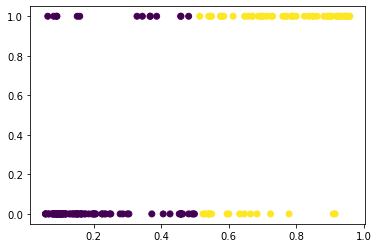

In [71]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])
plt.scatter(y_pred_proba, y_test, c=y_pred)

#### Was your data overfit?

Training Accuracy = 0.79
validate Accuracy = 0.80
Test     Accuracy = 0.83

- Model works well on unseen data, suggest that it is NOT overfit

### 5. Bonus How do different strategies for handling the missing values in the age column affect model performance?

- When i deleted all of the missing values my model accuracy went way down.  When i imputed the values with mean, median, most_frequent, the accuracy of my model was not effected.


### 6. Bonus: How do different strategies for encoding sex affect model performance?

- I only using a binary encoding when using sex in my model.  Without using sex a data input in to my model its accuracy went down, so I know sex is important in how the model works. 

### 7. Bonus: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

### Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

### C=.01,.1,1,10,100,1000

- Low c values kill my models accuracy , high c values do no affect it 

### Bonus Bonus: how does scaling the data interact with your choice of C?

- We are not allowed to scale the data so I do not know

# Lets scale age and fare for fun